In [1]:
library(pheatmap)
library(tidyverse)
library(glue)

data_directory = 'Figure6_data'

################################################################################
# Functions
################################################################################



── Attaching packages ─────────────────────────────────────── tidyverse 1.3.1 ──

✔ ggplot2 3.3.6     ✔ purrr   0.3.4
✔ tibble  3.1.7     ✔ dplyr   1.0.9
✔ tidyr   1.2.0     ✔ stringr 1.4.0
✔ readr   2.1.2     ✔ forcats 0.5.1

── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()



**Figure 6A**

In [4]:
################################################################################
# Import TPM values from SalmonTE
################################################################################

TPM = read.csv(glue("{data_directory}/TPM.csv"))

row.names(TPM) = TPM$TE
TPM = select(TPM, -TE)
TPM = TPM[rowSums(TPM) >= 2, ]

for (i in 1:length(colnames(TPM))){
  
  if (grepl('ESC', colnames(TPM)[i])){
    
    current_name = colnames(TPM)[i]
    colnames(TPM)[i] = glue::glue('{current_name}_SRA')
    
  }
  
  if (grepl('mTEC', colnames(TPM)[i])){
    
    current_name = colnames(TPM)[i]
    colnames(TPM)[i] = glue::glue('{current_name}_ours')
    
  }
  
  else if (!(grepl('ESC', colnames(TPM)[i]))){
    
    current_name = colnames(TPM)[i]
    
    colnames(TPM)[i] = glue::glue('{current_name}_GTEx')
    
  }
  
}

ID = colnames(TPM)
sampleInfo = data.frame(ID,row.names=colnames(TPM))
sampleInfo = suppressWarnings(separate(sampleInfo, 
                                       col = ID, 
                                       into = c('patient', 'tissue', 'batch'), 
                                       sep = '_'))
sampleInfo$ID = row.names(sampleInfo)

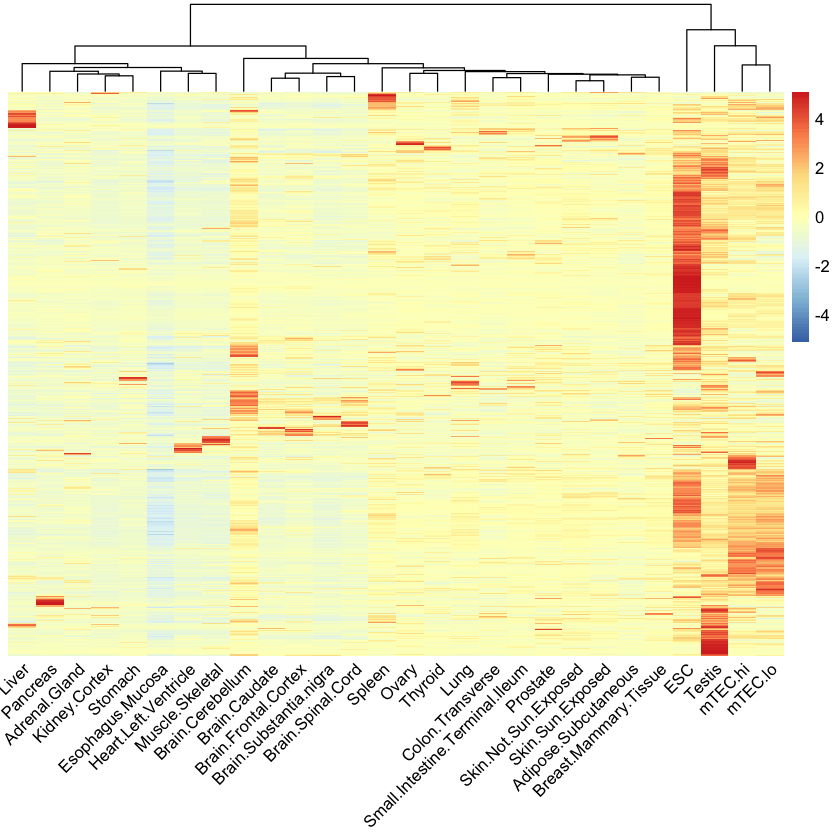

In [7]:
################################################################################
# Heatmap
################################################################################

## Collapse tissue replicates

counter = 1
for (i in (unique(sampleInfo$tissue))){

  samples = subset(sampleInfo, tissue == i)$ID
  
  entry = rowMeans(TPM[ , colnames(TPM) %in% samples])
  
  if (counter == 1){
    
    output = data.frame('placeholder' = entry)
    names(output) = i
    
  }
  
  else{
    
    output[i] = entry
    
  }
  
  counter = counter + 1
  
}

averaged_TPM = output

## Plot heatmap

my_heatmap = pheatmap(averaged_TPM, 
                      cluster_rows=T,
                      show_rownames=F,
                      show_colnames = T,
                      cluster_cols=T,
                      scale = 'row',
                      angle_col = 45,
                      treeheight_row = 0)

**Figure 6B**